In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.info() #this tells us about the columns of data as we can see there aree sum null values in sum attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.isnull().sum() #checking for null values in each column 

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# Removing the null values with simple imputer

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='most_frequent')

In [10]:
df1 = pd.DataFrame(imputer.fit_transform(df) , columns = df.columns)

In [11]:
df1.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

- we have handled the null values

- id will not be a classifying factor for our ml model so let us drop it 

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [13]:
temp = df1.drop('id' , axis = 1)

In [14]:
temp

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [15]:
for i in temp:
    print ()
    print (i)
    tset = set(temp[i].to_list())
    print(tset)
    print()


age
{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0}


bp
{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}


sg
{1.02, 1.025, 1.005, 1.015, 1.01}


al
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}


su
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}


rbc
{'normal', 'abnormal'}


pc
{'normal', 'abnormal'}


pcc
{'present', 'notpresent'}


ba
{'present', 'notpresent'}


bgr
{22.0, 70.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.

In [16]:
print(temp["pcv"].mode())
print(temp['wc'].mode())
print(temp['rc'].mode())

0    41
Name: pcv, dtype: object
0    9800
Name: wc, dtype: object
0    5.2
Name: rc, dtype: object


In [17]:
temp['pcv'] = temp['pcv'].apply(lambda x: '41' if x=='\t?' else x)

In [18]:
def replace_value(df, target_column, wrong_value, right_value):
    df[target_column] = df[target_column].apply(lambda x: right_value if x == wrong_value else x)


In [19]:
replace_value(temp, 'wc', '\t6200', '6200')

In [20]:
replace_value(temp, 'wc', '\t?', '9800')

In [21]:
replace_value(temp, 'wc', '\t8400', '8400')

In [22]:
replace_value(temp, 'rc', '\t?', '5.2')

In [23]:
replace_value(temp, 'pcv', '\t43', '43')

In [24]:
replace_value(temp, 'classification', 'ckd\t', 'ckd')

In [25]:
replace_value(temp, 'cad', '\tno', 'no')

In [26]:
replace_value(temp, 'dm', '\tno', 'no')

In [27]:
replace_value(temp, 'dm', '\tyes', 'yes')

In [28]:
replace_value(temp, 'dm', ' yes', 'yes')

In [29]:
for i in temp:
    print ()
    print (i)
    tset = set(temp[i].to_list())
    print(tset)
    print()


age
{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0}


bp
{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}


sg
{1.02, 1.025, 1.005, 1.015, 1.01}


al
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}


su
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}


rbc
{'normal', 'abnormal'}


pc
{'normal', 'abnormal'}


pcc
{'present', 'notpresent'}


ba
{'present', 'notpresent'}


bgr
{22.0, 70.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.

- we have cleared our data 

In [30]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             400 non-null    object
 1   bp              400 non-null    object
 2   sg              400 non-null    object
 3   al              400 non-null    object
 4   su              400 non-null    object
 5   rbc             400 non-null    object
 6   pc              400 non-null    object
 7   pcc             400 non-null    object
 8   ba              400 non-null    object
 9   bgr             400 non-null    object
 10  bu              400 non-null    object
 11  sc              400 non-null    object
 12  sod             400 non-null    object
 13  pot             400 non-null    object
 14  hemo            400 non-null    object
 15  pcv             400 non-null    object
 16  wc              400 non-null    object
 17  rc              400 non-null    object
 18  htn       

- after imputation all data became object type 

In [31]:
df= df.drop('id' , axis=1)

In [32]:
df_numeric = df.select_dtypes(exclude=['object']).columns
print(df_numeric)

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')


In [33]:
for i in df_numeric:
    temp[i]= temp[i].apply(lambda x: float(x))

In [34]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  rc              400 non-null    obj

# now we will lable encode our non integer value


In [35]:
from sklearn import preprocessing

In [36]:
encoded = temp.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))

In [37]:
encoded

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,3,3,1,0,1,1,0,0,48,...,30,69,33,1,1,0,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,24,53,33,0,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,17,67,33,0,1,0,1,0,1,0
3,40,2,0,4,0,1,0,1,0,44,...,18,59,18,1,0,0,1,1,1,0
4,43,3,1,2,0,1,1,0,0,33,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,33,59,29,0,0,0,0,0,0,1
396,34,2,4,0,0,1,1,0,0,3,...,40,69,43,0,0,0,0,0,0,1
397,8,3,3,0,0,1,1,0,0,27,...,35,58,35,0,0,0,0,0,0,1
398,11,1,4,0,0,1,1,0,0,41,...,37,64,40,0,0,0,0,0,0,1


<AxesSubplot: >

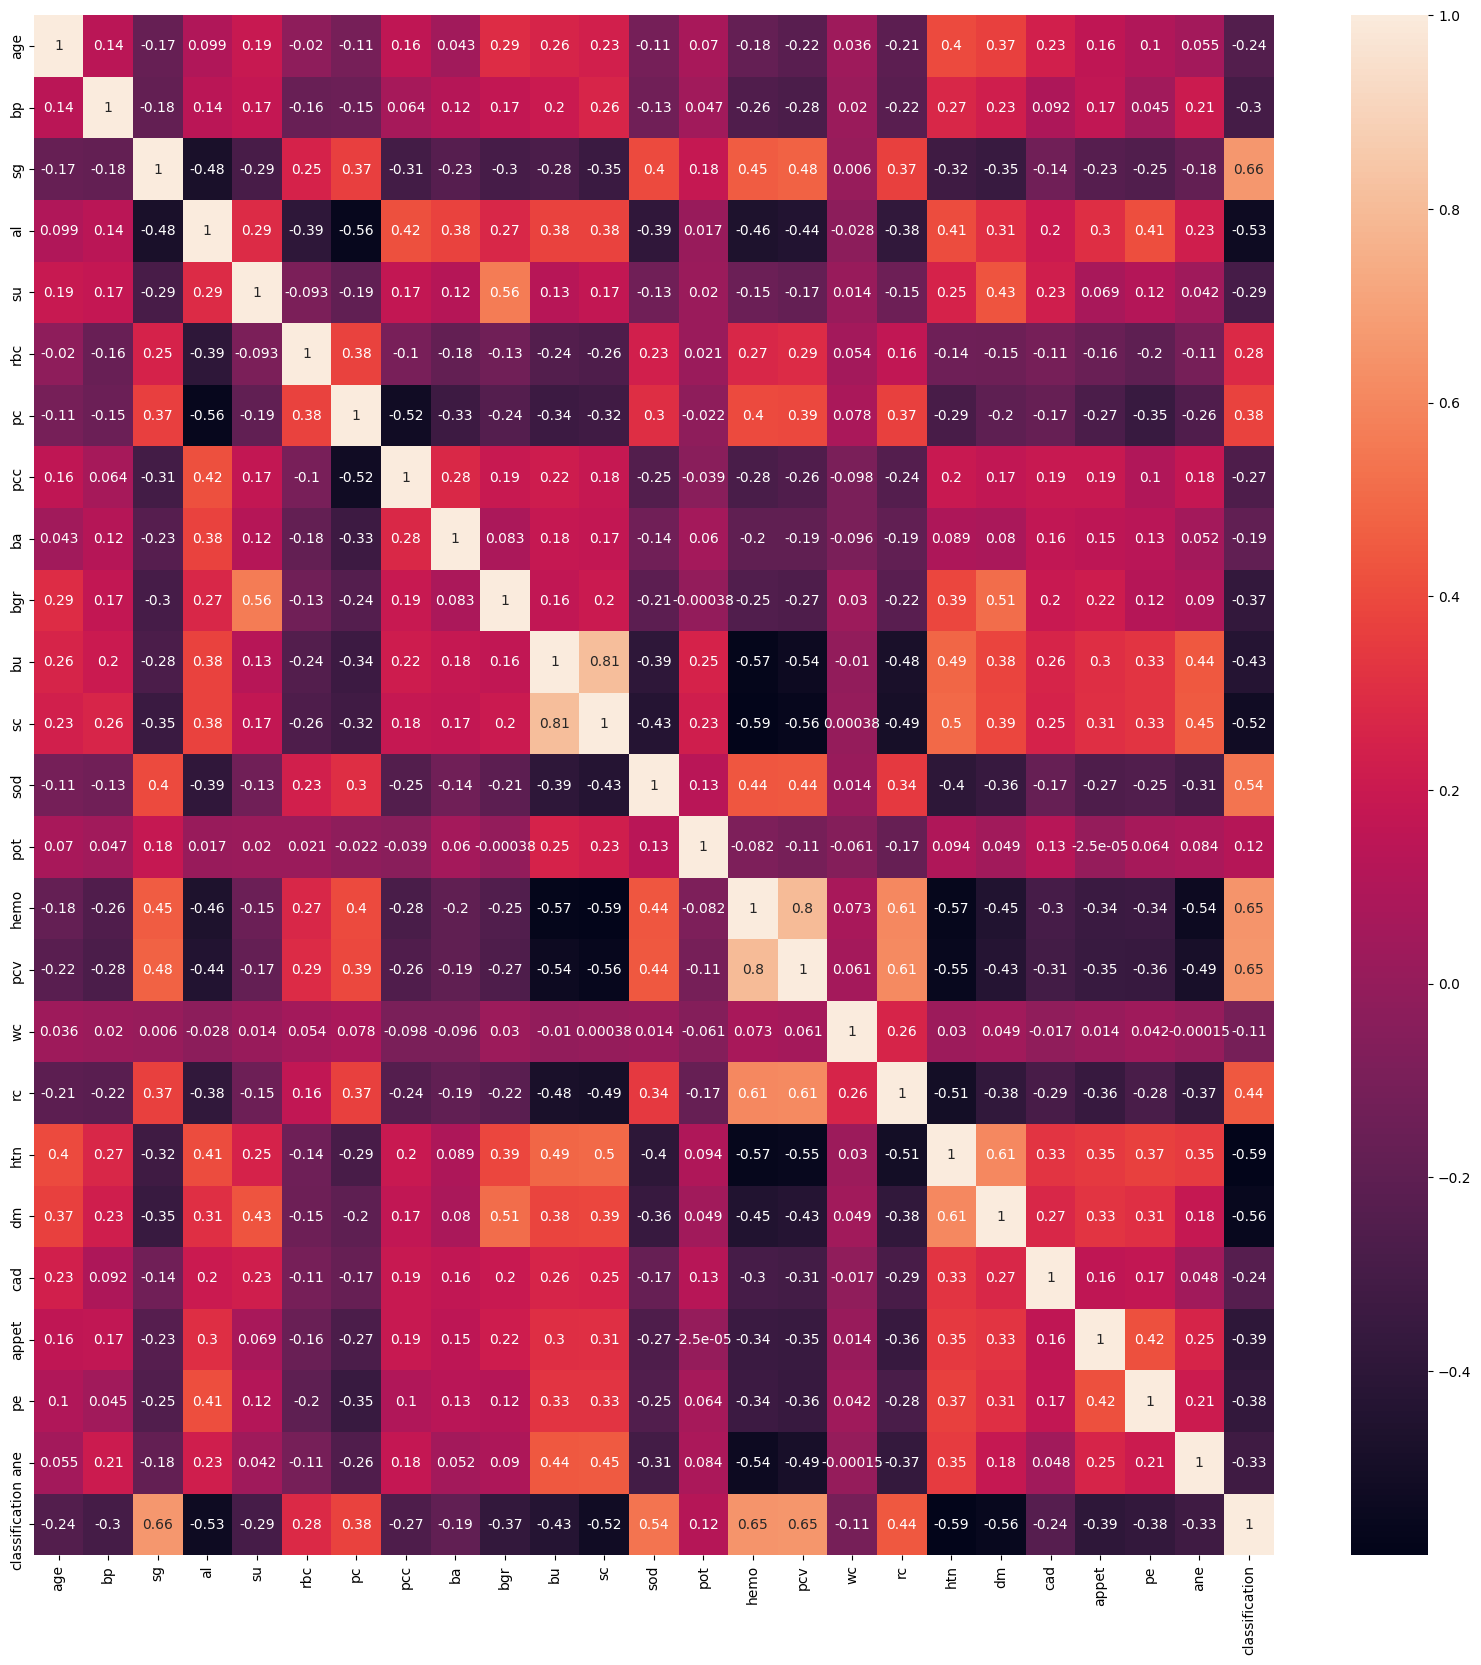

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(encoded.corr() , annot = True)

<AxesSubplot: >

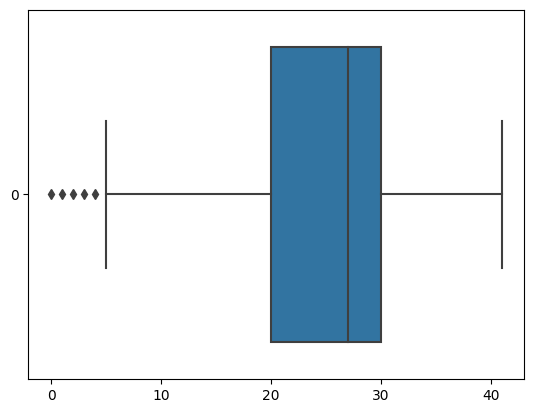

In [39]:
sns.boxplot(encoded['pcv'] , orient='h')

In [45]:
x = encoded.drop(['classification'], axis = 1)
y = encoded['classification']

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scale = MinMaxScaler((-1,1))
x = scale.fit_transform(x_ros)
y = y_ros

In [55]:
x.shape

(500, 24)

In [54]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(.95)
x_pca = pca.fit_transform(x)

In [58]:
x_pca.shape

(500, 18)

- drastic reduction 

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
x_train , x_test , y_train , y_test =train_test_split(x_pca , y , test_size=0.2)

# deep learning model

In [64]:
from tensorflow import keras

In [79]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint , EarlyStopping
from keras.models import Sequential , Model
from keras.optimizers import Adam 
from sklearn.model_selection import KFold

In [72]:
def model():
    clf = Sequential()
    clf.add(Dense(15 , input_shape = (x_train.shape[1], ) , activation = 'relu'))
    clf.add(Dropout(0.2))
    clf.add(Dense(15 ,activation='relu'))
    clf.add(Dropout(0.4))
    clf.add(Dense(1 , activation= 'sigmoid'))
    clf.compile(optimizer =Adam(), loss='binary_crossentropy' , metrics=['accuracy'])
    
    return clf

In [73]:
model = model()

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 0s 20ms/step - loss: 0.4787 - accuracy: 0.8687 - val_loss: 0.4282 - val_accuracy: 0.9125
Epoch 2/10
10/10 [==============================] - 0s 12ms/step - loss: 0.4371 - accuracy: 0.9094 - val_loss: 0.4062 - val_accuracy: 0.9375
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 0.4301 - accuracy: 0.9094 - val_loss: 0.3842 - val_accuracy: 0.9500
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 0.3869 - accuracy: 0.9375 - val_loss: 0.3622 - val_accuracy: 0.9750
Epoch 5/10
10/10 [==============================] - 0s 15ms/step - loss: 0.3708 - accuracy: 0.9594 - val_loss: 0.3399 - val_accuracy: 0.9750
Epoch 6/10
10/10 [==============================] - 0s 16ms/step - loss: 0.3611 - accuracy: 0.9312 - val_loss: 0.3178 - val_accuracy: 0.9750
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 0.3500 - accuracy: 0.9344 - val_loss: 0.2963 - val_accuracy: 0.9750
Epoch 8/10
10

- accuracy kept increasing in each epoch we can impliment early stopping but our data is very small we dont need that 

In [83]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 0s 9ms/step - loss: 0.1922 - accuracy: 1.0000
Test accuracy: 1.0
